### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)


Text(0.5, 0.98, 'ocean regions, subdivided, with atlantic mask')

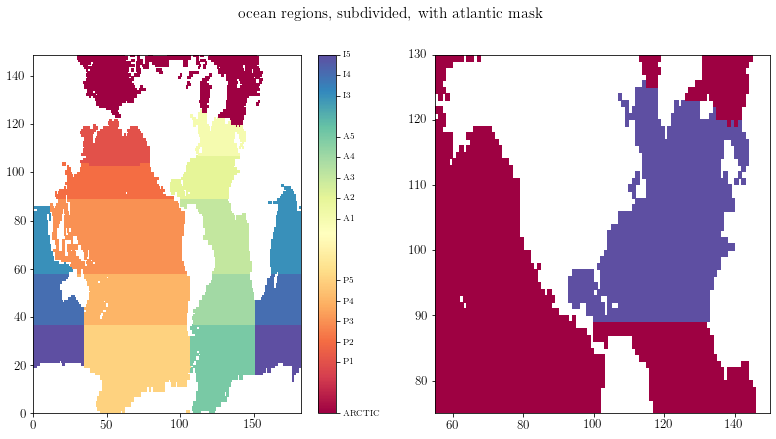

In [4]:
regs = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

regdict = {'ARCTIC' : {'number' : 0.5},
           'P1' : {'number': 1.0},
          'P2' : {'number': 1.2},
           'P3' : {'number': 1.4},
           'P4' : {'number': 1.6},
           'P5' : {'number': 1.8},
            'A1' : {'number': 2.4},
          'A2' : {'number': 2.6},
           'A3' : {'number': 2.8},
           'A4' : {'number': 3},
           'A5' : {'number': 3.2},
           'I3' : {'number': 3.6},
           'I4' : {'number': 3.8},
           'I5' : {'number': 4},
           
          }
    
tics = []
tcm = 'Spectral'
tmask = nc.Dataset('/gpfs/data/greenocean/software/resources/breakdown/clq_basin_masks_ORCA.nc')

maskno = np.zeros([149,182])
for i in range(0, len(regs)):
    maskno[tmask[regs[i]][:] == 1] = regdict[regs[i]]['number']
    tics.append(regdict[regs[i]]['number'])
maskno[maskno == 0] = np.nan

masknoATL = np.copy(maskno)

masknoATL[np.where(masknoATL == 2.6) ]= 5
masknoATL[np.where(masknoATL == 2.4) ]= 5
masknoATL[masknoATL < 5] = 0


maskno_broad = np.zeros([31,149,182])
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')

for i in range(0,31):
        maskno_broad[i,:,:] = maskno
        
maskno_broad = maskno_broad.astype('float')
tmesh_float = tmesh.tmask[0,:,:,:].values.astype('float')
  
        
maskno_broad =  maskno_broad * tmesh_float
maskno_broad[maskno_broad == 0] = np.nan    

masknoATL_broad = np.copy(maskno_broad)
masknoATL_broad[np.where(masknoATL_broad == 2.6) ]= 5
masknoATL_broad[np.where(masknoATL_broad == 2.4) ]= 5
masknoATL_broad[masknoATL_broad < 5] = 0

#####

fact = 1.1
fig, axs = plt.subplots(1,2, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

w = axs[0].pcolor(maskno, cmap = tcm, vmin = 0.5, vmax = 4)
cbar = plt.colorbar(w, ticks=tics, ax = axs[0])
t = cbar.ax.set_yticklabels(['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5'], fontsize = 9)
plt.suptitle('ocean regions, subdivided')

w = axs[1].pcolor(masknoATL, cmap = tcm, vmin = 0.5, vmax = 4)
axs[1].set_xlim([55,150])
axs[1].set_ylim([75,130])
plt.suptitle('ocean regions, subdivided, with atlantic mask')

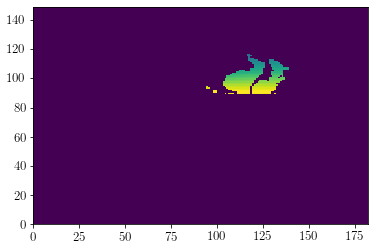

In [5]:
tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,:,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tmesh['csize'] = tmesh['csize'].where(masknoATL_broad == 5, 0)

plt.pcolormesh(tmesh.csize[27,:,:])

In [6]:
tmesh

<xarray.Dataset>
Dimensions:       (t: 1, x: 182, y: 149, z: 31)
Dimensions without coordinates: t, x, y, z
Data variables: (12/45)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  (t) float64 ...
    tmask         (t, z, y, x) int8 ...
    umask         (t, z, y, x) int8 ...
    ...            ...
    gdepw_0       (t, z, y, x) float32 ...
    gdept_1d      (t, z) float64 ...
    gdepw_1d      (t, z) float64 ...
    e3t_1d        (t, z) float64 ...
    e3w_1d        (t, z) float64 ...
    csize         (z, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  28/02/2019 15:51:26 +0000

[  4.9999378   15.00028841  25.00175946  35.0054128   45.01331662
  55.02949901  65.06180502  75.12551243  85.25036944  95.49428432
 105.96992049 116.89623778 128.69790307 142.19524676 158.96061456
 181.96278352 216.64791899]

[ 272.4767218   364.30304026  511.53476547  732.20085553 1033.21734145]

[1405.69747945 1830.88500209 2289.76791732 2768.24234033 3257.47886166]

[3752.44220334 4250.40123866 4749.91326561 5250.22661276]



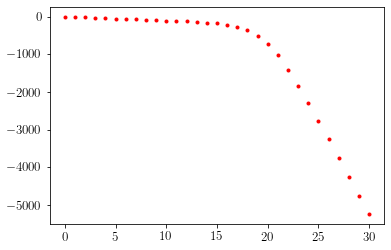

In [7]:
yax = np.squeeze(tmesh.gdept_1d.values)

plt.plot(np.arange(0,31,1),-yax, 'r.')
print(yax[0:17])
print('')
print(yax[17:22])
print('')
print(yax[22:27])
print('')
print(yax[27:31])
print('')

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,:,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]
tmesh['csize'] = tmesh['csize'].where(masknoATL_broad == 5, 0)
tmesh = tmesh.rename({"z": "deptht"})


def get_atl_c(tmod, yr, tmesh):
    
    savenam = f'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/ccont/{tmod}_AtlC_{yr}.nc'
    print(savenam)
    
    w = xr.open_dataset(f'/gpfs/data/greenocean/software/runs/{tmod}/ORCA2_1m_{yr}0101_{yr}1231_ptrc_T.nc')
    
    surf = w.DIC.isel(deptht = slice(0,17)).weighted(tmesh['csize'].isel(deptht = slice(0,17))).\
    mean(dim = ['x','y','deptht']).values *1e6
    L1 = w.DIC.isel(deptht = slice(17,22)).weighted(tmesh['csize'].isel(deptht = slice(17,22))).\
    mean(dim = ['x','y','deptht']).values *1e6
    L2 = w.DIC.isel(deptht = slice(22,27)).weighted(tmesh['csize'].isel(deptht = slice(22,27))).\
    mean(dim = ['x','y','deptht']).values *1e6
    L3 = w.DIC.isel(deptht = slice(27,31)).weighted(tmesh['csize'].isel(deptht = slice(27,31))).\
    mean(dim = ['x','y','deptht']).values *1e6

    # plt.figure()
    # ts = np.arange(1,13,1)
    # plt.plot(ts,surf)
    # plt.plot(ts,L1)
    # plt.plot(ts,L2)
    # plt.plot(ts,L3)

    times = pd.date_range(f"{yr}/01/01",f"{yr+1}/01/01",freq='MS',closed='left')
    data_vars = {'surf_DIC':(['time_counter'], surf,
    {'units': 'umol/L',
    'long_name':'levels 0:17 (python counting)'}),

                 'L1':(['time_counter'], L1,
    {'units': 'umol/L',
    'long_name':'levels 17:22 (python counting)'}),

                 'L2':(['time_counter'], L2,
    {'units': 'umol/L',
    'long_name':'levels 22:27 (python counting)'}),

                 'L3':(['time_counter'], L3,
    {'units': 'umol/L',
    'long_name':'levels 27:bottom (python counting)'}),

                }
    # define coordinates
    coords = {'time_counter': (['time_counter'], times),
            }
    # define global attributes
    attrs = {'made in':'AMOC-PLANKTOM/carbon-content-atl.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)
    


In [8]:
extract = False

if extract:
    for yr in range(1957,2023):

        get_atl_c('TOM12_TJ_RVA0', yr, tmesh)
        get_atl_c('TOM12_TJ_RVB0', yr, tmesh)
        get_atl_c('TOM12_TJ_RVC0', yr, tmesh)
        get_atl_c('TOM12_TJ_RVD0', yr, tmesh)

In [9]:
def make_yearlist(yrst, yrend, tr):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/ccont/{tr}_AtlC_{yrs[i]}.nc'
        ylist.append(ty)
    return ylist

A_AtlC = xr.open_mfdataset(make_yearlist(1957,2022,'TOM12_TJ_RVA0'))
B_AtlC = xr.open_mfdataset(make_yearlist(1957,2022,'TOM12_TJ_RVB0'))
C_AtlC = xr.open_mfdataset(make_yearlist(1957,2022,'TOM12_TJ_RVC0'))
D_AtlC = xr.open_mfdataset(make_yearlist(1957,2022,'TOM12_TJ_RVD0'))


In [10]:
cA = xr.open_dataset('./data/NAtl_Cflx_TOM12_TJ_RVA0_1957-2022.nc')
cB = xr.open_dataset('./data/NAtl_Cflx_TOM12_TJ_RVB0_1957-2022.nc')
cC = xr.open_dataset('./data/NAtl_Cflx_TOM12_TJ_RVC0_1957-2022.nc')
cD = xr.open_dataset('./data/NAtl_Cflx_TOM12_TJ_RVD0_1957-2022.nc')

Text(0.5, 0.98, '')

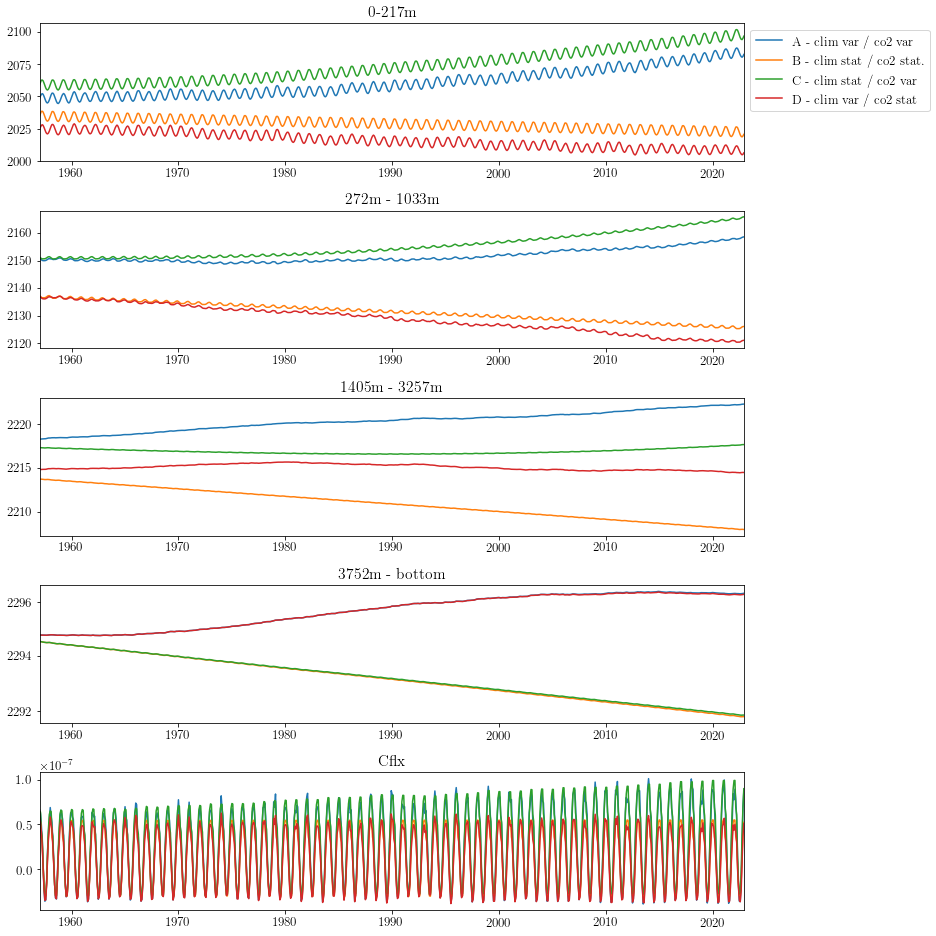

In [11]:
fact = 1.1
fig, axs = plt.subplots(5,1, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
axs[ind].plot(A_AtlC.time_counter, A_AtlC.surf_DIC, label = 'A - clim var / co2 var')
axs[ind].plot(B_AtlC.time_counter, B_AtlC.surf_DIC, label = 'B - clim stat / co2 stat.')
axs[ind].plot(C_AtlC.time_counter, C_AtlC.surf_DIC, label = 'C - clim stat / co2 var')
axs[ind].plot(D_AtlC.time_counter, D_AtlC.surf_DIC, label = 'D - clim var / co2 stat')

ind = 1
axs[ind].plot(A_AtlC.time_counter, A_AtlC.L1, label = 'A')
axs[ind].plot(B_AtlC.time_counter, B_AtlC.L1, label = 'B')
axs[ind].plot(C_AtlC.time_counter, C_AtlC.L1, label = 'C')
axs[ind].plot(D_AtlC.time_counter, D_AtlC.L1, label = 'D')

ind = 2
axs[ind].plot(A_AtlC.time_counter, A_AtlC.L2, label = 'A')
axs[ind].plot(B_AtlC.time_counter, B_AtlC.L2, label = 'B')
axs[ind].plot(C_AtlC.time_counter, C_AtlC.L2, label = 'C')
axs[ind].plot(D_AtlC.time_counter, D_AtlC.L2, label = 'D')

ind = 3
axs[ind].plot(A_AtlC.time_counter, A_AtlC.L3, label = 'A')
axs[ind].plot(B_AtlC.time_counter, B_AtlC.L3, label = 'B')
axs[ind].plot(C_AtlC.time_counter, C_AtlC.L3, label = 'C')
axs[ind].plot(D_AtlC.time_counter, D_AtlC.L3, label = 'D')

ind = 4
axs[ind].plot(cA.time_counter, cA.Cflx, label = 'A')
axs[ind].plot(cB.time_counter, cB.Cflx, label = 'B')
axs[ind].plot(cC.time_counter, cC.Cflx, label = 'C')
axs[ind].plot(cD.time_counter, cD.Cflx, label = 'D')


axs[0].legend(bbox_to_anchor = [1,1])

tits = ['0-217m','272m - 1033m', '1405m - 3257m', '3752m - bottom','Cflx']

for i in range(0,5):
    axs[i].set_title(tits[i])
    axs[i].set_xlim([D_AtlC.time_counter[0],D_AtlC.time_counter[791]])
plt.tight_layout()
plt.suptitle('')

Text(0.5, 0.98, '')

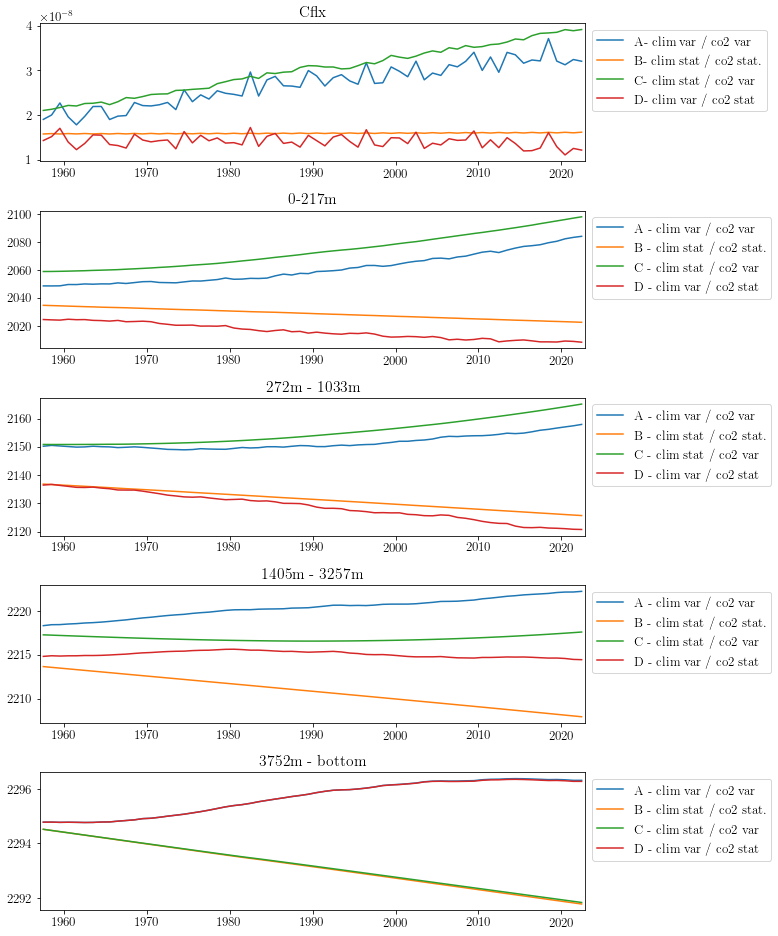

In [12]:
fact = 1.1
fig, axs = plt.subplots(5,1, figsize=(10*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 1
axs[ind].plot(A_AtlC.time_counter.groupby('time_counter.year').mean(),\
              A_AtlC.surf_DIC.groupby('time_counter.year').mean(),\
              label = 'A - clim var / co2 var')
axs[ind].plot(B_AtlC.time_counter.groupby('time_counter.year').mean(),\
              B_AtlC.surf_DIC.groupby('time_counter.year').mean(),\
              label = 'B - clim stat / co2 stat.')
axs[ind].plot(C_AtlC.time_counter.groupby('time_counter.year').mean(),\
              C_AtlC.surf_DIC.groupby('time_counter.year').mean(),\
              label = 'C - clim stat / co2 var')
axs[ind].plot(D_AtlC.time_counter.groupby('time_counter.year').mean(),\
              D_AtlC.surf_DIC.groupby('time_counter.year').mean(),\
              label = 'D - clim var / co2 stat')

ind = 2
axs[ind].plot(A_AtlC.time_counter.groupby('time_counter.year').mean(),\
              A_AtlC.L1.groupby('time_counter.year').mean(),\
              label = 'A - clim var / co2 var')
axs[ind].plot(B_AtlC.time_counter.groupby('time_counter.year').mean(),\
              B_AtlC.L1.groupby('time_counter.year').mean(),\
              label = 'B - clim stat / co2 stat.')
axs[ind].plot(C_AtlC.time_counter.groupby('time_counter.year').mean(),\
              C_AtlC.L1.groupby('time_counter.year').mean(),\
              label = 'C - clim stat / co2 var')
axs[ind].plot(D_AtlC.time_counter.groupby('time_counter.year').mean(),\
              D_AtlC.L1.groupby('time_counter.year').mean(),\
              label = 'D - clim var / co2 stat')

ind = 3
axs[ind].plot(A_AtlC.time_counter.groupby('time_counter.year').mean(),\
              A_AtlC.L2.groupby('time_counter.year').mean(),\
              label = 'A - clim var / co2 var')
axs[ind].plot(B_AtlC.time_counter.groupby('time_counter.year').mean(),\
              B_AtlC.L2.groupby('time_counter.year').mean(),\
              label = 'B - clim stat / co2 stat.')
axs[ind].plot(C_AtlC.time_counter.groupby('time_counter.year').mean(),\
              C_AtlC.L2.groupby('time_counter.year').mean(),\
              label = 'C - clim stat / co2 var')
axs[ind].plot(D_AtlC.time_counter.groupby('time_counter.year').mean(),\
              D_AtlC.L2.groupby('time_counter.year').mean(),\
              label = 'D - clim var / co2 stat')

ind = 4
axs[ind].plot(A_AtlC.time_counter.groupby('time_counter.year').mean(),\
              A_AtlC.L3.groupby('time_counter.year').mean(),\
              label = 'A - clim var / co2 var')
axs[ind].plot(B_AtlC.time_counter.groupby('time_counter.year').mean(),\
              B_AtlC.L3.groupby('time_counter.year').mean(),\
              label = 'B - clim stat / co2 stat.')
axs[ind].plot(C_AtlC.time_counter.groupby('time_counter.year').mean(),\
              C_AtlC.L3.groupby('time_counter.year').mean(),\
              label = 'C - clim stat / co2 var')
axs[ind].plot(D_AtlC.time_counter.groupby('time_counter.year').mean(),\
              D_AtlC.L3.groupby('time_counter.year').mean(),\
              label = 'D - clim var / co2 stat')

ind = 0
axs[ind].plot(cA.time_counter.groupby('time_counter.year').mean(),\
              cA.Cflx.groupby('time_counter.year').mean(), label = 'A- clim var / co2 var')
axs[ind].plot(cB.time_counter.groupby('time_counter.year').mean(),\
              cB.Cflx.groupby('time_counter.year').mean(), label = 'B- clim stat / co2 stat.')
axs[ind].plot(cC.time_counter.groupby('time_counter.year').mean(),\
              cC.Cflx.groupby('time_counter.year').mean(), label = 'C- clim stat / co2 var')
axs[ind].plot(cD.time_counter.groupby('time_counter.year').mean(),\
              cD.Cflx.groupby('time_counter.year').mean(), label = 'D- clim var / co2 stat')

for i in range(0,5):
    axs[i].legend(bbox_to_anchor = [1,1])

tits = ['Cflx','0-217m','272m - 1033m', '1405m - 3257m', '3752m - bottom',]

for i in range(0,5):
    axs[i].set_title(tits[i])
    axs[i].set_xlim([D_AtlC.time_counter[0],D_AtlC.time_counter[791]])
plt.tight_layout()
plt.suptitle('')

### 
This assumption misses an important component of variability in the contemporary sink: the effect of a variable climate on Fnat. The sink can be expressed as SOCEAN = FanthSS + FanthNS + FnatNS, where ‘SS’ and ‘NS’ denote steady state and non-steady state climate45. FanthSS represents the carbon uptake driven by rising atmospheric CO2 levels, while FnatNS and FanthNS represent fluxes of natural and anthropogenic carbon driven by climate change and natural climate variability. FnatNS is expected to drive most of the variability in SOCEAN61, and its importance is likely to increase in future low-emissions scenarios, where reduction in the rate of increase of atmospheric CO2 concentrations will reduce FanthSS, further limiting the applicability of
the steady state assumption. The relative contributions of FanthSS, FanthNS, and Fnat
NS to the carbon sink, the mechanisms controlling the variability of these components, and how they may change with time, are not well understood.

GCB protocol:

|     | co2 variable | co2 static |
| -------- | ------- | ------- 
| clim var (aka dynamic) |(A) |(D)|
| clim stat (aka bias) | (C)  |(B)|

From Hauck 2020 (Frontiers):

    SOCEAN = Fant,ss + Fant,ns + Fnat,ns

    FsimA = Fant,ss + Fant,ns + Fnat,ss + Fnat,ns + Fdrift+bias

    FsimB = Fnat,ss + Fdrift+bias

Fnat,ss is defined to be 0. 

it follows that:

    FsimC = Fant,ss + Fnat,ss + Fdrift+bias

    FsimD = Fnat,ns + Fnat,ss + Fdrift+bias

If we want to partition SOCEAN into its components Fant,ss + Fant,ns + Fnat,ns, 

we can get:

    Fnat,ns = FsimD - FsimB
    Fant,ss = FsimC - FsimB
    Fant,ns = FsimA - FsimB - Fnat,ns - Fant,ss 
    
    SOCEAN = FsimA - FsimB
    
or the sum of the above 3 terms.


45 - hauck 2020
61 - gruber 2023

In [13]:
Fnatns = cD - cB
Fantss = cC - cB
Fantns = cA - cB - Fnatns - Fantss
SOcean = cA - cB
SOceancheck = Fnatns + Fantss + Fantns

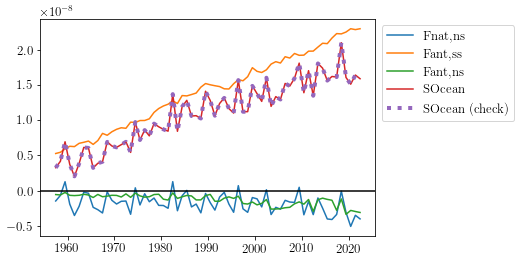

In [14]:
plt.figure()

plt.plot(Fnatns.time_counter.groupby('time_counter.year').mean(),\
         Fnatns.Cflx.groupby('time_counter.year').mean(), label = 'Fnat,ns')
plt.plot(Fantss.time_counter.groupby('time_counter.year').mean(),\
         Fantss.Cflx.groupby('time_counter.year').mean(), label = 'Fant,ss')
plt.plot(Fantns.time_counter.groupby('time_counter.year').mean(),\
         Fantns.Cflx.groupby('time_counter.year').mean(), label = 'Fant,ns')
plt.plot(SOcean.time_counter.groupby('time_counter.year').mean(),\
         SOcean.Cflx.groupby('time_counter.year').mean(), label = 'SOcean')
plt.plot(SOceancheck.time_counter.groupby('time_counter.year').mean(),\
         SOceancheck.Cflx.groupby('time_counter.year').mean(),\
         label = 'SOcean (check)', linestyle = ':', linewidth = 4)
plt.axhline(y=0, color = 'k')
plt.legend(bbox_to_anchor = [1,1])

In [15]:
RVA0_amoc = xr.open_dataset('/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/AMOC_TOM12_TJ_RVA0_1945-2022.nc')


Text(0, 0.5, 'AMOC')

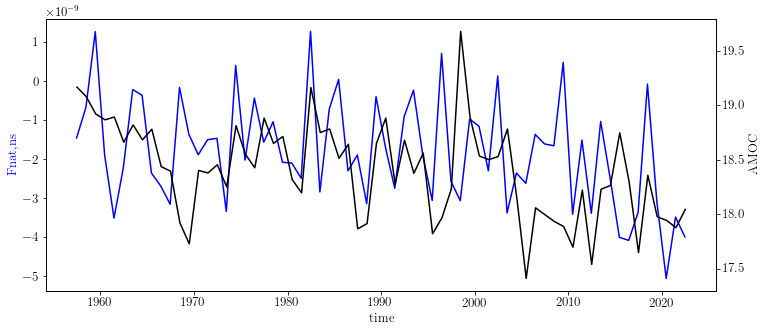

In [16]:
RVA0_vyrez = RVA0_amoc.sel(TIME=slice(f'1957-01-01', f'2022-12-31'))

fig, ax1 = plt.subplots(figsize = (12,5))

# Plotting on the first y-axis
ax1.plot(Fnatns.time_counter.groupby('time_counter.year').mean(),\
         Fnatns.Cflx.groupby('time_counter.year').mean(), 'b-', label = 'Fnat,ns') # 'g-' means green solid line
ax1.set_xlabel('time')
ax1.set_ylabel('Fnat,ns', color='b')

# Creating the second y-axis
ax2 = ax1.twinx()
ax2.plot(RVA0_vyrez.TIME.groupby('TIME.year').mean(),\
         RVA0_vyrez.AMOC.groupby('TIME.year').mean(), 'k-', label = 'AMOC' )  # 'b-' means blue solid line
ax2.set_ylabel('AMOC', color='k')

next thing to try:
    - detrended, anomaly corelation 
    - you have the v velocities - do a v flux
        - for which maybe fix the strange border around iceland, manually. 
       

In [17]:
DIC_natns = D_AtlC - B_AtlC
DIC_antss = C_AtlC - B_AtlC
DIC_antns = A_AtlC - B_AtlC - DIC_natns - DIC_antss
DIC_Ocean = A_AtlC - B_AtlC
DIC_Oceancheck = DIC_natns + DIC_antss + DIC_antns

In [18]:
DIC_natns

<xarray.Dataset>
Dimensions:       (time_counter: 792)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1957-01-01 ... 2022-12-01
Data variables:
    surf_DIC      (time_counter) float64 dask.array<chunksize=(12,), meta=np.ndarray>
    L1            (time_counter) float64 dask.array<chunksize=(12,), meta=np.ndarray>
    L2            (time_counter) float64 dask.array<chunksize=(12,), meta=np.ndarray>
    L3            (time_counter) float64 dask.array<chunksize=(12,), meta=np.ndarray>

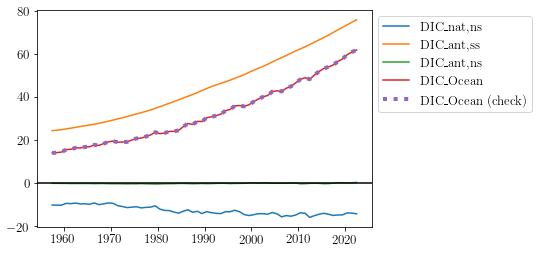

In [19]:
plt.figure()

plt.plot(DIC_natns.time_counter.groupby('time_counter.year').mean(),\
         DIC_natns.surf_DIC.groupby('time_counter.year').mean(), label = 'DIC_nat,ns')
plt.plot(DIC_antss.time_counter.groupby('time_counter.year').mean(),\
         DIC_antss.surf_DIC.groupby('time_counter.year').mean(), label = 'DIC_ant,ss')
plt.plot(DIC_antns.time_counter.groupby('time_counter.year').mean(),\
         DIC_antns.surf_DIC.groupby('time_counter.year').mean(), label = 'DIC_ant,ns')
plt.plot(DIC_Ocean.time_counter.groupby('time_counter.year').mean(),\
         DIC_Ocean.surf_DIC.groupby('time_counter.year').mean(), label = 'DIC_Ocean')
plt.plot(DIC_Oceancheck.time_counter.groupby('time_counter.year').mean(),\
         DIC_Oceancheck.surf_DIC.groupby('time_counter.year').mean(),\
         label = 'DIC_Ocean (check)', linestyle = ':', linewidth = 4)
plt.axhline(y=0, color = 'k')
plt.legend(bbox_to_anchor = [1,1])

## correlate flux with amoc

In [20]:
def make_yearlist(yrst, yrend, dtype, mod = 'RVA0'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/{mod}_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

#A_ptrc = xr.open_mfdataset(make_yearlist(1950,2020,'ptrc', 'RVA0'))
A_diad = xr.open_mfdataset(make_yearlist(1950,2020,'diad', 'RVA0'))

#B_ptrc = xr.open_mfdataset(make_yearlist(1950,2020,'ptrc', 'RVB0'))
B_diad = xr.open_mfdataset(make_yearlist(1950,2020,'diad', 'RVB0'))

#C_ptrc = xr.open_mfdataset(make_yearlist(1950,2020,'ptrc', 'RVC0'))
C_diad = xr.open_mfdataset(make_yearlist(1950,2020,'diad', 'RVC0'))

#D_ptrc = xr.open_mfdataset(make_yearlist(1950,2020,'ptrc', 'RVD0'))
D_diad = xr.open_mfdataset(make_yearlist(1950,2020,'diad', 'RVD0'))

ATL (A-C) cflx vs amoc  0.3082783338181646 0.008908995229175222
ATL (D-B) cflx vs amoc 0.17511950731255596 0.1440962785483508
 - - - 
NAT (A-C) cflx vs amoc  0.19427194238796902 0.10450043472015332
NAT (D-B) cflx vs amoc 0.12245338126745284 0.30899613286562394
 - - - 
NAL (A-C) cflx vs amoc  0.10630142861672143 0.3776057111877186
NAL (D-B) cflx vs amoc 0.11888099636565319 0.3234289659337193
 - - - 
NAM (A-C) cflx vs amoc  -0.07214500214526307 0.5499105177740785
NAM (D-B) cflx vs amoc -0.21127563427785392 0.07694979197191289
 - - - 
NAH (A-C) cflx vs amoc  0.48783459328437717 1.594624578821635e-05
NAH (D-B) cflx vs amoc 0.31600622406922974 0.0072612149612344525
 - - - 


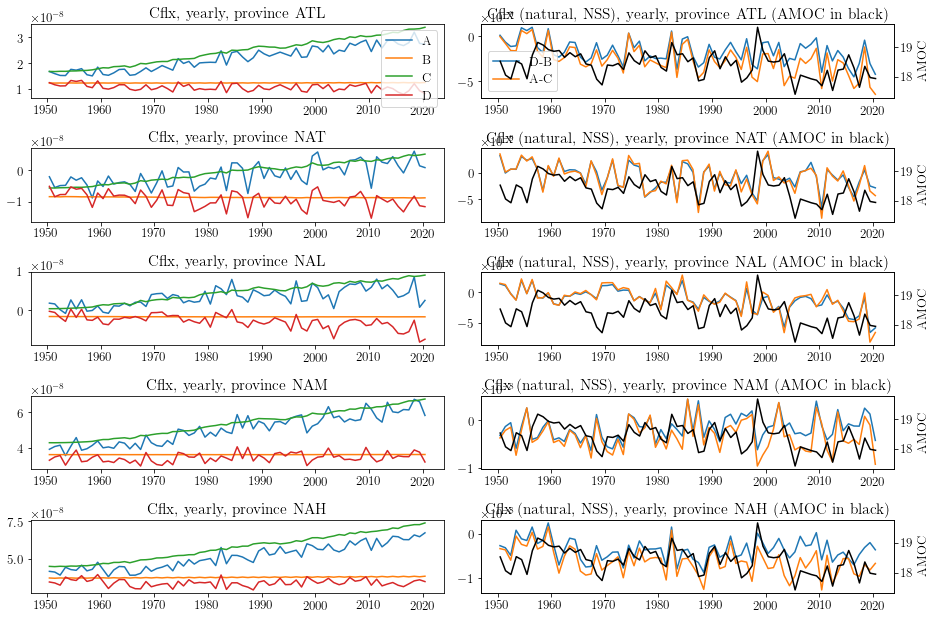

In [21]:
from scipy.stats import pearsonr

RVA0_amoc = xr.open_dataset('/gpfs/home/mep22dku/scratch/AMOC-PLANKTOM/data/AMOC_TOM12_TJ_RVA0_1945-2022.nc')
RVA0_vyrez = RVA0_amoc.sel(TIME=slice(f'1950-01-01', f'2020-12-31'))

provs = ['ATL','NAT','NAL','NAM','NAH']


fact = 1.1
fig, axs = plt.subplots(5,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for p in range(0,5):
    tprov = provs[p]

    A_cflx = A_diad.regmeanf.sel(varf = 'Cflx').sel(prov = tprov)
    B_cflx = B_diad.regmeanf.sel(varf = 'Cflx').sel(prov = tprov)
    C_cflx = C_diad.regmeanf.sel(varf = 'Cflx').sel(prov = tprov)
    D_cflx = D_diad.regmeanf.sel(varf = 'Cflx').sel(prov = tprov)
    axs[p*2].plot(A_cflx.time_counter.groupby('time_counter.year').mean(), \
             A_cflx.groupby('time_counter.year').mean(), label = 'A')
    axs[p*2].plot(A_cflx.time_counter.groupby('time_counter.year').mean(), \
             B_cflx.groupby('time_counter.year').mean(), label = 'B')
    axs[p*2].plot(A_cflx.time_counter.groupby('time_counter.year').mean(), \
             C_cflx.groupby('time_counter.year').mean(), label = 'C')
    axs[p*2].plot(A_cflx.time_counter.groupby('time_counter.year').mean(), \
             D_cflx.groupby('time_counter.year').mean(), label = 'D')
    
    axs[p*2].set_title(F'Cflx, yearly, province {tprov}')
    axs[0].legend(loc = 'best')
    
    #D-B, C-A
    axs[p*2+1].plot(D_cflx.time_counter.groupby('time_counter.year').mean(), \
             (D_cflx.groupby('time_counter.year').mean() - B_cflx.groupby('time_counter.year').mean()),\
            label = 'D-B')
    axs[p*2+1].plot(D_cflx.time_counter.groupby('time_counter.year').mean(), \
         (A_cflx.groupby('time_counter.year').mean() - C_cflx.groupby('time_counter.year').mean()),\
        label = 'A-C')
    
    tval1 = (A_cflx.groupby('time_counter.year').mean() - C_cflx.groupby('time_counter.year').mean()).values
    tval2 = (D_cflx.groupby('time_counter.year').mean() - B_cflx.groupby('time_counter.year').mean()).values
    
    amoc = RVA0_vyrez.AMOC.groupby('TIME.year').mean()
    correlation_coefficient, pv = pearsonr(amoc, tval1)
    correlation_coefficient2, pv2 = pearsonr(amoc, tval2)
    print(f'{tprov} (A-C) cflx vs amoc  {correlation_coefficient} {pv}')
    print(f'{tprov} (D-B) cflx vs amoc {correlation_coefficient2} {pv2}')
    print(' - - - ')
    
    axb1 = axs[p*2+1]
    axb = axb1.twinx()
    axb.plot(RVA0_vyrez.TIME.groupby('TIME.year').mean(),\
             RVA0_vyrez.AMOC.groupby('TIME.year').mean(), 'k-', label = 'AMOC' )  # 'b-' means blue solid line
    axb.set_ylabel('AMOC', color='k')    
    axs[p*2+1].set_title(f'Cflx (natural, NSS), yearly, province {tprov} (AMOC in black)')
    
    
    axs[1].legend()

plt.tight_layout()

In [22]:
provs = ['ATL','NAT','NAL','NAM','NAH']

for p in range(0,5):
    
    tprov = provs[p]

    A_cflx = A_diad.regmeanf.sel(varf = 'Cflx').sel(prov = tprov)
    B_cflx = B_diad.regmeanf.sel(varf = 'Cflx').sel(prov = tprov)
    C_cflx = C_diad.regmeanf.sel(varf = 'Cflx').sel(prov = tprov)
    D_cflx = D_diad.regmeanf.sel(varf = 'Cflx').sel(prov = tprov)